# TP BDM : APPLICATIONS SUR NAIVE BAYES 

**Réalisé par : Hayat HACHEMI - SIT 1** 
<br></br>
**Mai 2020**

Durant ce TP , on va exploiter Naive Bayes Algorithm dans deux de ses domains d'applications :
- Analyse des sentiments , 
- Classification de documents .


On utilisera Naïve Bayes Classification qui n'est rien d'autre que l'application des règles de Bayes pour former des probabilités de classification . Dans ce TP on utilisera **MultinomialNB** . Plus de détails sur les types de NB Algorithms sous **scikit-learn**: 
https://scikit-learn.org/stable/modules/naive_bayes.html

## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

%matplotlib inline 

# Partie 01 : Prédiction des sentiments à partir des avis sur les vêtements

L'analyse des sentiments est un sujet vital dans le domaine de la PNL ,elle entre dans la grande catégorie des tâches de classification de texte . Le but est de fournir une phrase ou une liste de phrases et un classificateur est censé dire si le sentiment derrière cela est positif, négatif ou neutre. 

**Objectif : Utiliser Naïve Bayes Classification pour prédire les sentiments des clients sur des vêtements d'une société privée à partir de leurs avis**
<br></br>
Dans cette partie de Tp , on va essayer de prédire les sentiments des clients à partir de leurs avis , le dataset utilisée est **« Women's E-Commerce Clothing Reviews »** téléchargeable depuis Kaggle via : https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews .

**Credit** : 
Une grande partie de cette partie inspirée de : https://www.kaggle.com/burhanykiyakoglu/predicting-sentiment-from-clothing-reviews

## Getting Data 

In [2]:
df_c=pd.read_csv("Womens_Clothing_ECommerce_Reviews.csv")

In [3]:
df_c.shape

(23486, 10)

Ce dataset comprend 23486 lignes et 10 feature variables. Chaque ligne correspond à un avis client et comprend les variables:
<br></br>
**Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
<br></br>
**Age**: Positive Integer variable of the reviewers age.
<br></br>
**Title**: String variable for the title of the review.
<br></br>
**Review Text**: String variable for the review body.
<br></br>
**Rating**: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
<br></br>
**Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
<br></br>
**Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
<br></br>
**Division Name**: Categorical name of the product high level division.
<br></br>
**Department Name**: Categorical name of the product department name.
<br></br>
**Class Name**: Categorical name of the product class name.

In [4]:
df_c.head(5)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
df_c.dtypes

Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

## Preparing Data 

### Cleaning Data 

Avant d'entamner les analyses , il est nécessaire  de préparer nos donnés afin de les avoir bien rangées . 

Pour les besoins de ce TP , on gardera que les variables : Review Text,Rating,Class Name et Age

In [6]:
df_ct = df_c[['Review Text','Rating','Class Name','Age']]

In [7]:
df_ct.head(5)

,Review Text,Rating,Class Name,Age
0,Absolutely wonderful - silky and sexy and comf...,4,Intimates,33
1,Love this dress! it's sooo pretty. i happene...,5,Dresses,34
2,I had such high hopes for this dress and reall...,3,Dresses,60
3,"I love, love, love this jumpsuit. it's fun, fl...",5,Pants,50
4,This shirt is very flattering to all due to th...,5,Blouses,47


In [8]:
df_ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review Text  22641 non-null  object
 1   Rating       23486 non-null  int64 
 2   Class Name   23472 non-null  object
 3   Age          23486 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 734.1+ KB


In [9]:
df_ct.isnull().sum()

Review Text    845
Rating           0
Class Name      14
Age              0
dtype: int64

In [10]:
df_ct.describe()

,Rating,Age
count,23486.000000,23486.000000
mean,4.196032,43.198544
std,1.110031,12.279544
min,1.000000,18.000000
25%,4.000000,34.000000
50%,5.000000,41.000000
75%,5.000000,52.000000
max,5.000000,99.000000


Afin de travailler avec des donnés complètes , on supprimera les lignes ayant des donnés manquantes , cette suppression n'aura pas une grande influence sur nos analyses .

In [11]:
df_ct=df_ct.dropna()

In [12]:
df_ct.isnull().sum()

Review Text    0
Rating         0
Class Name     0
Age            0
dtype: int64

In [13]:
df_ct.shape

(22628, 4)

### Eploring Data 


#### Analyzing values counts

In [14]:
df_ct['Class Name'].value_counts()

Dresses           6145
Knits             4626
Blouses           2983
Sweaters          1380
Pants             1350
Jeans             1104
Fine gauge        1059
Skirts             903
Jackets            683
Lounge             669
Swim               332
Outerwear          319
Shorts             304
Sleep              214
Legwear            158
Intimates          147
Layering           132
Trend              118
Casual bottoms       1
Chemises             1
Name: Class Name, dtype: int64

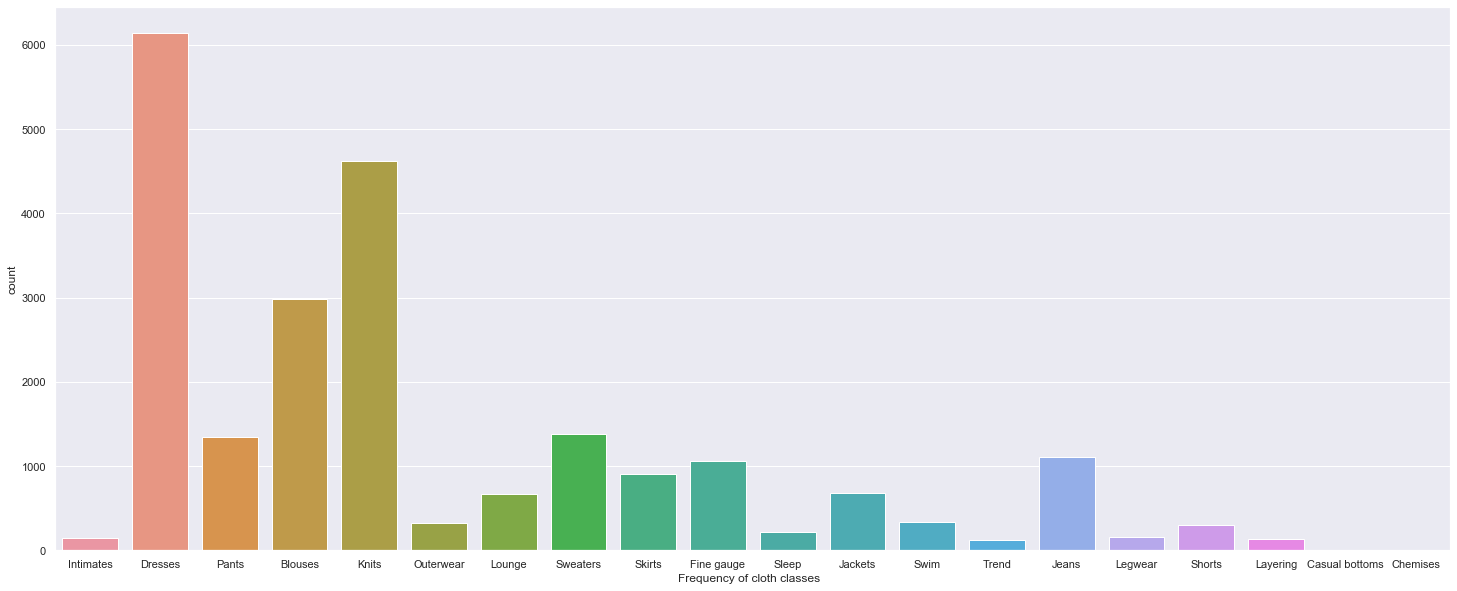

In [15]:
sns.set(rc={'figure.figsize':(25,10)})
p=sns.countplot(x='Class Name', data=df_ct)
p.axes.xaxis.label.set_text("Frequency of cloth classes  ")

In [16]:
df_ct['Rating'].value_counts()

5    12527
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64

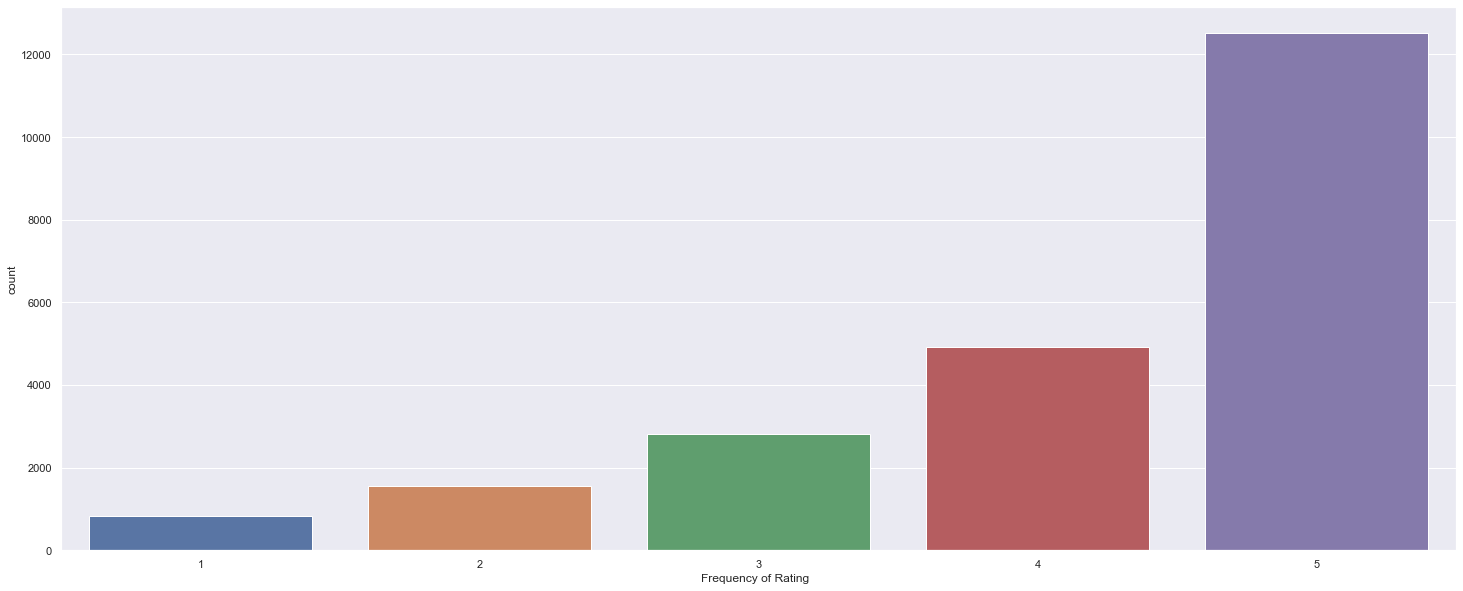

In [17]:
sns.set(rc={'figure.figsize':(25,10)})
p=sns.countplot(x='Rating', data=df_ct)
p.axes.xaxis.label.set_text("Frequency of Rating  ")

In [18]:
ranges = [0,10,20,30,40,50,60,70,80,90,100]
cl=df_ct['Age'].groupby(pd.cut(df_ct['Age'], ranges)).count()
cl

Age
(0, 10]         0
(10, 20]      149
(20, 30]     3070
(30, 40]     7542
(40, 50]     5700
(50, 60]     3783
(60, 70]     2009
(70, 80]      277
(80, 90]       86
(90, 100]      12
Name: Age, dtype: int64

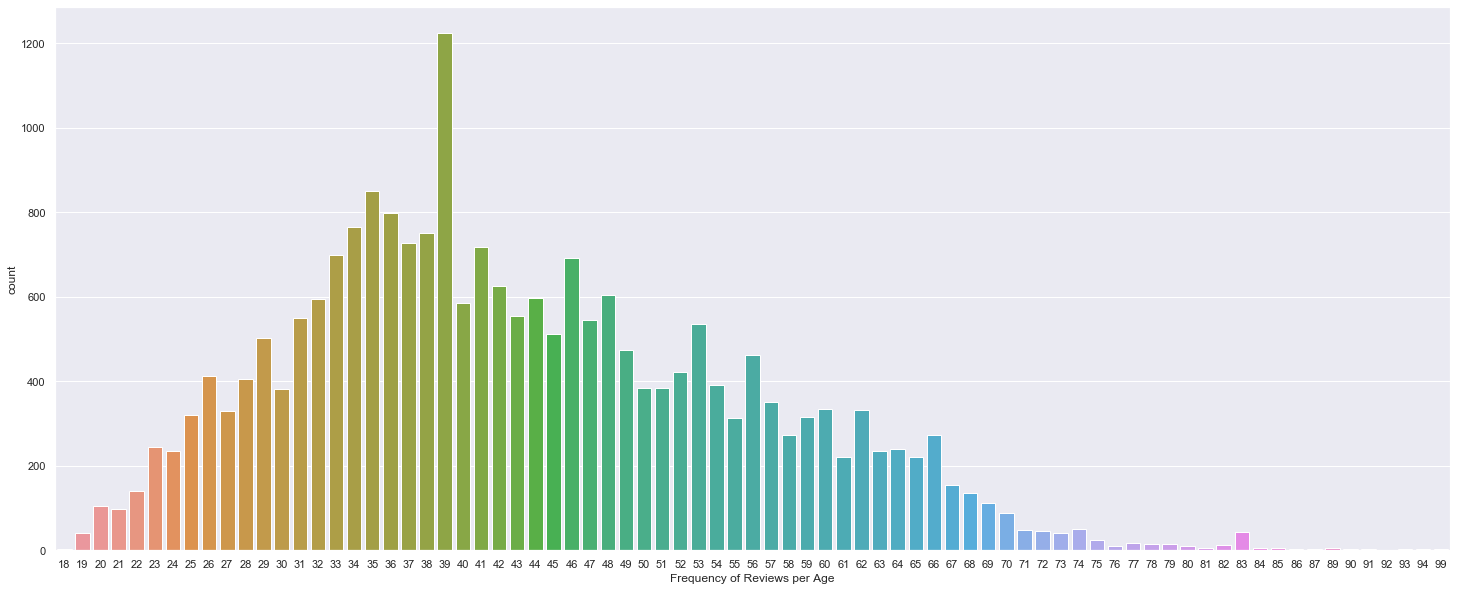

In [19]:
sns.set(rc={'figure.figsize':(25,10)})
p=sns.countplot(x='Age', data=df_ct)
p.axes.xaxis.label.set_text("Frequency of Reviews per Age")

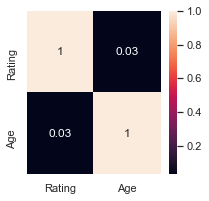

In [20]:
corr=df_ct.corr()
fix,ax =plt.subplots(figsize=(3,3))
sns.heatmap(corr,annot=True)

#### Adding the Word Counts 
<br></br> 
Ajouter le nombre de mots au datset est une très bonne pratique , nous pourrons les utiliser pour accéder à des informations utiles ultérieurement ( pas dans ce TP ).

In [21]:
# CountVectorizer() : converting  a collection of text documents to a matrix of token counts
vectorizer = CountVectorizer()
# assigning a shorter name for the analyze which tokenizes the string
analyzer = vectorizer.build_analyzer()

def wordcounts(s):
    c = {}
    # tokenize the string and continue, if it is not empty
    if analyzer(s):
        d = {}
        # find counts of the vocabularies and transform to array 
        w = vectorizer.fit_transform([s]).toarray()
        # vocabulary and index (index of w)
        vc = vectorizer.vocabulary_
        # items() transforms the dictionary's (word, index) tuple pairs
        for k,v in vc.items():
            d[v]=k # d -> index:word 
        for index,i in enumerate(w[0]):
            c[d[index]] = i # c -> word:count
    return  c

# adding new column to the dataframe
df_ct['Word Counts'] = df_ct['Review Text'].apply(wordcounts)
df_ct.head(5)


,Review Text,Rating,Class Name,Age,Word Counts
0,Absolutely wonderful - silky and sexy and comf...,4,Intimates,33,"{'absolutely': 1, 'and': 2, 'comfortable': 1, ..."
1,Love this dress! it's sooo pretty. i happene...,5,Dresses,34,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below':..."
2,I had such high hopes for this dress and reall...,3,Dresses,60,"{'and': 3, 'be': 1, 'bottom': 1, 'but': 2, 'ch..."
3,"I love, love, love this jumpsuit. it's fun, fl...",5,Pants,50,"{'and': 1, 'but': 1, 'compliments': 1, 'every'..."
4,This shirt is very flattering to all due to th...,5,Blouses,47,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1..."


#### Demonstrating words Densities 

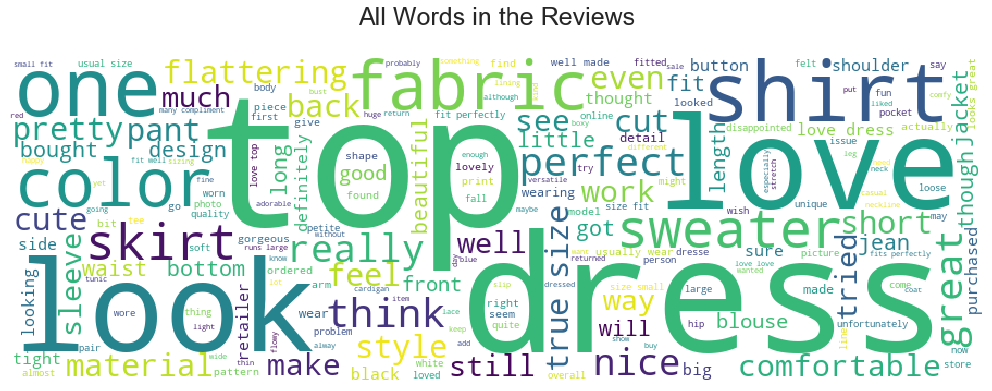

In [22]:
rvw = df_ct['Review Text']
plt.subplots(figsize=(18,6))
wordcloud = WordCloud(background_color='white',
                      width=900,
                      height=300
                     ).generate(" ".join(rvw))
plt.imshow(wordcloud)
plt.title('All Words in the Reviews\n',size=25)
plt.axis('off')
plt.show()

#### Building a Sentiment Classifier
<br></br>
Comme nous n'avons pas de colonne qui montre le sentiment : positif ou négatif , j'ai défini une nouvelle colonne de sentiment. Pour ce faire, j'ai supposé que les avis qui avaient une note de 4 ou plus étaient positifs et 2 ou moins étaient négatifs . De plus, je n'ai pas inclus les lignes dont les notes neutres sont égales à 3. 

In [23]:
# Rating of 4 or higher -> positive
# Rating of 2 or lower -> negative 
# Rating of 3 -> neutral (not taken into account)
df_ct_new = df_ct[df_ct['Rating'] != 3]
df_ct_new['Sentiment'] = df_ct_new['Rating'] >=4
df_ct_new.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Review Text,Rating,Class Name,Age,Word Counts,Sentiment
0,Absolutely wonderful - silky and sexy and comf...,4,Intimates,33,"{'absolutely': 1, 'and': 2, 'comfortable': 1, ...",True
1,Love this dress! it's sooo pretty. i happene...,5,Dresses,34,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below':...",True
3,"I love, love, love this jumpsuit. it's fun, fl...",5,Pants,50,"{'and': 1, 'but': 1, 'compliments': 1, 'every'...",True
4,This shirt is very flattering to all due to th...,5,Blouses,47,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1...",True
5,"I love tracy reese dresses, but this one is no...",2,Dresses,49,"{'0p': 1, 'alterations': 1, 'am': 1, 'and': 4,...",False


## Creating Model

### Splitting Data

In [24]:
# split data
train_data,test_data = train_test_split(df_ct_new,train_size=0.8,random_state=42)
# select the columns and prepare data for the models 
X_train = vectorizer.fit_transform(train_data['Review Text'])
y_train = train_data['Sentiment']
X_test = vectorizer.transform(test_data['Review Text'])
y_test = test_data['Sentiment']

### Fitting Model

In [25]:
# use Naive Bayes Algorithm 
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Testing & Evaluating Model

### Adding Results to the Dataframe

In [26]:
df_nb = train_data.copy()
df_nb['Naive Bayes'] = naive_bayes.predict(X_train)


In [27]:
df_nb.sample(10)

,Review Text,Rating,Class Name,Age,Word Counts,Sentiment,Naive Bayes
6162,This tank top is comfortable and very cute. it...,5,Knits,51,"{'and': 1, 'another': 1, 'as': 1, 'bonus': 1, ...",True,True
3299,"I wanted this dress so much, i ordered it twic...",1,Dresses,49,"{'about': 1, 'an': 1, 'and': 2, 'area': 1, 'as...",False,False
12774,"Nice quality, but enough material for two sets...",4,Legwear,42,"{'at': 1, 'bottom': 1, 'but': 1, 'can': 1, 'di...",True,True
3459,This coat is a beauty. the embroidery is much ...,5,Sweaters,35,"{'all': 3, 'am': 2, 'and': 3, 'as': 1, 'at': 1...",True,True
13689,This is going to be a favorite. the fabric is ...,5,Blouses,60,"{'always': 1, 'am': 1, 'and': 1, 'are': 1, 'be...",True,True
17934,I loved the fit and vibrant color of this dres...,1,Dresses,31,"{'100': 1, 'and': 5, 'as': 1, 'boo': 1, 'but':...",False,False
17714,"I love this tee, the fabric is very comfortabl...",5,Knits,48,"{'and': 1, 'comfortable': 1, 'deep': 1, 'fabri...",True,True
11160,This is much prettier online than on me. too m...,2,Dresses,62,"{'down': 1, 'dress': 1, 'even': 1, 'is': 1, 'm...",False,True
15794,I love the photo of this and because the revie...,1,Jackets,67,"{'all': 2, 'and': 2, 'arm': 1, 'at': 2, 'becau...",False,False
18457,This is a unique take on a denim shirt! i have...,5,Blouses,26,"{'about': 1, 'but': 1, 'denim': 2, 'five': 1, ...",True,True


### Confusion Matrice

Une matrice de confusion fournit un résumé  des résultats prédictifs d'un problème de classification. Les prédictions correctes et incorrectes sont résumées dans un tableau avec leurs valeurs et classifiées par classe.


In [28]:
naive_bayes_cm=confusion_matrix(y_test.values, naive_bayes.predict(X_test))

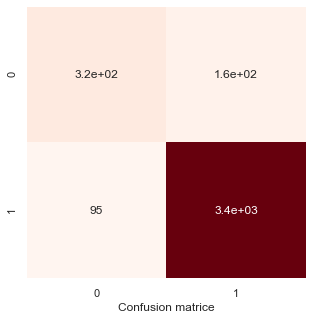

In [29]:
sns.set(rc={'figure.figsize':(5,5)})
p=sns.heatmap(naive_bayes_cm, annot = True, cmap="Reds",cbar=False)
p.axes.xaxis.label.set_text("Confusion matrice")

**Interprétation** :

**On remarque** que test data est accés beacoup plus sur les commentaires positifs (C'est logique ) 

*Vrai positif*: 320 résultats sont prédit négatif et c'est vrai.

*Vrai négatif*: 3400 résultats sont prédit positif et c'est vrai. 

*Faux positif*(erreur de type 1): 95 résultats sont prédit négatif et c'est faux.

*Faux négatif* (erreur de type 2): 160 résultats sont prédit  positif et c'est faux. 
 
**-Une perte de 50 % (160/320) des résultats négatives**

**-Une bonne prédiction pour les avis positifs** 


Comme on peut interpreter les prédiction avec **Crosstab** ayant le meme principe que la matrice de confusion !!!

In [30]:
pd.crosstab(y_test.values, naive_bayes.predict(X_test), rownames=['True Situation '], colnames=['Predicted Situation '], margins=True)

Predicted Situation,False,True,All
True Situation,,,
False,321,165,486
True,95,3380,3475
All,416,3545,3961


### Accuracy Score

In [31]:
print(accuracy_score(y_test, naive_bayes.predict(X_test)))

0.93436001009846


**On a Accuracy Score= 93% , ce qui signifie que la prédiction de 1 par 10 avis est incorrect, et 9 sont corrects !**

### Classification Report 

Un rapport de classification est utilisé pour mesurer la qualité des prédictions .

In [32]:
print(classification_report(y_test, naive_bayes.predict(X_test)))

              precision    recall  f1-score   support

       False       0.77      0.66      0.71       486
        True       0.95      0.97      0.96      3475

    accuracy                           0.93      3961
   macro avg       0.86      0.82      0.84      3961
weighted avg       0.93      0.93      0.93      3961



**On remarque** que le recall et la précision  des avis positifs est parfaite , tandis que :

- Le Recall de 'False' est inférieur a 70 % (66%) , ce qui signifie que le model ne prédit pas parfaitement les avis négatifs (Le Combien ?)  .Autrement dit , il signifie que 4 avis sur 10  sont manqués par le  modèle et 6 sont correctement identifiés .
- La précision de 'False' est tolérable ( 77% > 70 % ) .

*Pour ne pas oublier : Precision:  When it predicts yes, how often is it correct?.. Recall ( Recall = True Positive Rate ): When it's actually yes, how often does it predict yes?*

# Partie 02 : Prédiction de la classification des documents 

Il existe de nombreuses applications de la classification de texte dans le monde commercial. Par exemple, comme on a vu dans la partie précédente avec l'analyse des sentiments .
Dans la plupart des cas, nos problèmes du monde réel sont beaucoup plus compliqués que cela avec la classification binaire. Et  c'est ce que nous allons faire dans cette partie .


**Objectif : Utiliser Naïve Bayes Classification pour classer les plaintes en matière de financement des consommateurs en 9 classes prédéfinies a partir « Consumer Complaint Database » , téléchargeable via : https://catalog.data.gov/dataset/consumer-complaint-database .**

PS: une réduction de dataset a été faite pour des raisons techniques liées à la machine ( Garder que 30 000 lignes non null ) 



## Getting Data

In [33]:
df_cd = pd.read_csv('complaints.csv')

In [34]:
df_cd.shape

(80789, 18)

In [35]:
df_cd.head(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,24/09/2019,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,transworld systems inc. \nis trying to collect...,NaN,TRANSWORLD SYSTEMS INC,FL,335XX,NaN,Consent provided,Web,24/09/2019,Closed with explanation,Yes,NaN,3384392
1,19/09/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,PA,15206,NaN,Consent not provided,Web,20/09/2019,Closed with non-monetary relief,Yes,NaN,3379500
2,25/10/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,I would like to request the suppression of the...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,937XX,NaN,Consent provided,Web,25/10/2019,Closed with explanation,Yes,NaN,3417821
3,08/11/2019,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,"Over the past 2 weeks, I have been receiving e...",NaN,"Diversified Consultants, Inc.",NC,275XX,NaN,Consent provided,Web,08/11/2019,Closed with explanation,Yes,NaN,3433198
4,08/02/2019,Vehicle loan or lease,Lease,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,HYUNDAI CAPITAL AMERICA,FL,33161,NaN,Consent not provided,Web,08/02/2019,Closed with non-monetary relief,Yes,NaN,3146310


In [36]:
df_cd.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

## Preparing Data

### Cleaning Data

Dna ce TP , on abesoin que de “Product” et “Consumer complaint narrative”.Pour mieux comprendre l'objectif , voixi un exemple :  
- **Input**: Consumer_complaint_narrative

Exemple: “ I have outdated information on my credit report that I have previously disputed that has yet to be removed this information is more then seven years old and does not meet credit reporting requirements”

- **Output**: product


In [37]:
col = ['Product', 'Consumer complaint narrative']
df = df_cd[col]

In [38]:
df.head(10)

,Product,Consumer complaint narrative
0,Debt collection,transworld systems inc. \nis trying to collect...
1,"Credit reporting, credit repair services, or o...",NaN
2,"Credit reporting, credit repair services, or o...",I would like to request the suppression of the...
3,Debt collection,"Over the past 2 weeks, I have been receiving e..."
4,Vehicle loan or lease,NaN
5,Debt collection,NaN
6,"Credit reporting, credit repair services, or o...",NaN
7,Checking or savings account,NaN
8,"Credit reporting, credit repair services, or o...",NaN
9,"Credit reporting, credit repair services, or o...",NaN


In [39]:
df.isnull().sum()

Product                             0
Consumer complaint narrative    45998
dtype: int64

In [40]:
df=df.dropna()

In [41]:
df.shape

(34791, 2)

### Eploring Data

#### Analyzing categories of products 

In [42]:
df['Product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    15448
Debt collection                                                                  7364
Credit card or prepaid card                                                      3490
Mortgage                                                                         2767
Checking or savings account                                                      2045
Student loan                                                                     1292
Vehicle loan or lease                                                             861
Money transfer, virtual currency, or money service                                799
Payday loan, title loan, or personal loan                                         708
Consumer Loan                                                                       6
Payday loan                                                                         5
Credit card                                           

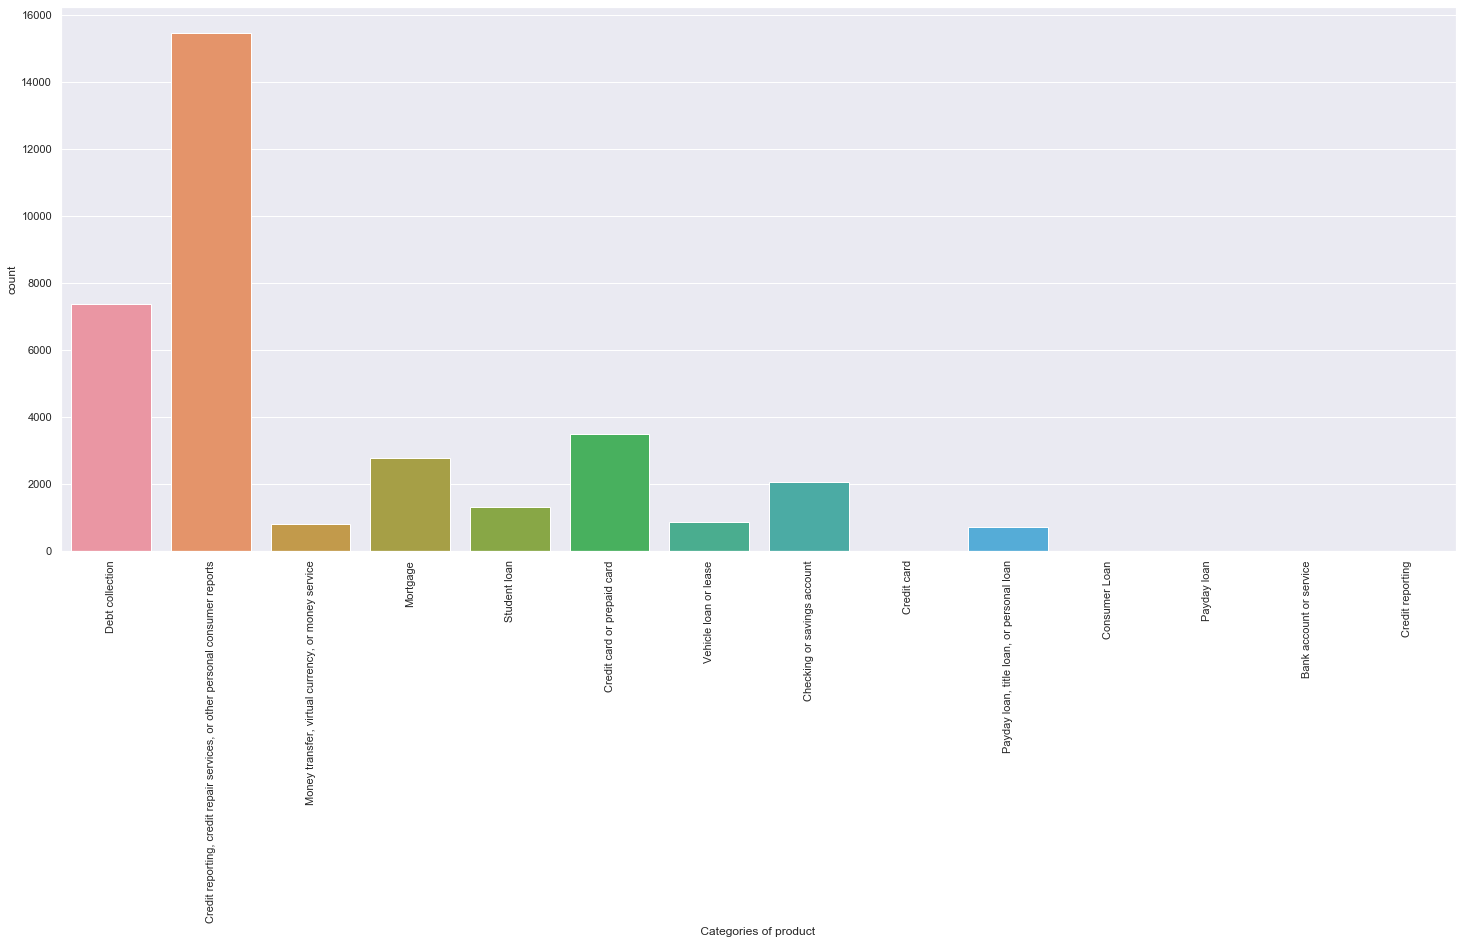

In [43]:
sns.set(rc={'figure.figsize':(25,10)})
p=sns.countplot(x='Product', data=df)
p.set_xticklabels(p.get_xticklabels(),rotation=90)
p.axes.xaxis.label.set_text(" Categories of product  ")

On ajustera les catégories des produits afin de fusionner ceux qui conviennent !

In [44]:
df.sample(10)

,Product,Consumer complaint narrative
4924,"Credit reporting, credit repair services, or o...",Unauthorized inquiries applied to my credit fi...
76689,"Credit reporting, credit repair services, or o...",NATIONAL CREDIT ADJUSTERS can bring this issue...
42171,Credit card or prepaid card,"On Wednesday, XX/XX/2019, at approximately XXX..."
34725,Credit card or prepaid card,Wells Fargo Card services is reporting on a de...
19718,"Credit reporting, credit repair services, or o...",This is the third time I have requested actual...
70934,"Credit reporting, credit repair services, or o...",I have disputed the inaccurate reporting on my...
78465,Debt collection,I have not received any documentation validati...
38291,Debt collection,Hello Today I received a call from ( XXXX ) XX...
61825,Mortgage,I scheduled a mortgage payment through my bank...
74805,Credit card or prepaid card,1-I closed my account with Discover Credit Car...


In [45]:
df=df[~df.Product.str.contains("Bank account or service")]
df['Product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    15448
Debt collection                                                                  7364
Credit card or prepaid card                                                      3490
Mortgage                                                                         2767
Checking or savings account                                                      2045
Student loan                                                                     1292
Vehicle loan or lease                                                             861
Money transfer, virtual currency, or money service                                799
Payday loan, title loan, or personal loan                                         708
Consumer Loan                                                                       6
Payday loan                                                                         5
Credit card                                           

In [46]:
df['Product'][df.Product.str.contains("Credit reporting")]='Credit Reporting'
df['Product'][df.Product.str.contains("Credit card")]='Credit Card'
df['Product'][df.Product.str.contains("Payday loan")]='Payday loan'
df['Product'][df.Product.str.contains("Consumer Loan")]='Payday loan'
df['Product'][df.Product.str.contains("Money transfer, virtual currency, or money service")]='Money Operations' #Rename

df['Product'].value_counts()

Credit Reporting               15450
Debt collection                 7364
Credit Card                     3493
Mortgage                        2767
Checking or savings account     2045
Student loan                    1292
Vehicle loan or lease            861
Money Operations                 799
Payday loan                      719
Name: Product, dtype: int64

In [47]:
df.sample(10)

,Product,Consumer complaint narrative
16608,Credit Reporting,I have tried to contact Transunion to regardin...
64940,Vehicle loan or lease,On XX/XX/XXXX Toyota Financial Services receiv...
28038,Money Operations,Somebody sent me XXXX dollars by XXXX in bank ...
36496,Student loan,I applied for all fixed interest loans and som...
77643,Mortgage,I own a home in XXXX Oklahoma I bought before ...
64042,Payday loan,I went to XXXX on XX/XX/2019 to see what perso...
68573,Debt collection,FCRA states information reporting has to be 10...
9955,Mortgage,Rushmore my mortgage servicer mailed me a Prop...
38008,Debt collection,XXXX XXXX 's office called XX/XX/XXXX and offe...
37129,Credit Card,"In XX/XX/2010, my MC was charged {$2000.00} to..."


#### Coding Category

On ajoutera une colonne qui codera les categories du produit sous forme d'entier pour pouvoir les exploiter 

In [48]:
df['category_id'] = df['Product'].factorize()[0]
df.sample(10)

,Product,Consumer complaint narrative,category_id
58744,Credit Card,This week I received a letter from Bank of Ame...,5
59362,Debt collection,XXXX XXXX XXXX is such a liar and so stupid th...,0
80768,Credit Reporting,I recently conducted a review of my credit rep...,1
61529,Mortgage,I had a mortgage with JP Morgan Chase and was ...,3
33820,Credit Reporting,"Notice to whom it be of concern, It is YOU I h...",1
79942,Money Operations,This involves a request to transfer an ira cd ...,2
63342,Debt collection,"On Thursday, XX/XX/2019, I was repeatedly call...",0
9166,Debt collection,Portfolio Recovery collections agency keeps vi...,0
50895,Debt collection,XX/XX/2019 the agent called 4 times from 2 sim...,0
53218,Credit Card,Chase has allowed merchants using cards that w...,5


## Creating Model


### Splitting Data 

In [49]:
# CountVectorizer() : converting  a collection of text documents to a matrix of token counts
vectorizer = CountVectorizer()
# split data
train_data,test_data = train_test_split(df,train_size=0.8,random_state=42)
# select the columns and prepare data for the models 
X_train = vectorizer.fit_transform(train_data['Consumer complaint narrative'])
y_train = train_data['category_id']
X_test = vectorizer.transform(test_data['Consumer complaint narrative'])
y_test = test_data['category_id']

### Fitting Model

In [50]:
# use Naive Bayes Algorithm 
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Testing & evaluating Model

### Adding Results to the Dataframe

In [51]:
df_nb = train_data.copy()
df_nb['Naive Bayes'] = naive_bayes.predict(X_train)
df_nb.sample(10)

,Product,Consumer complaint narrative,category_id,Naive Bayes
6131,Credit Reporting,"i disputed, via certified mail, inaccurate inf...",1,1
69432,Vehicle loan or lease,I got a car from a company in XXXX of XXXX In ...,6,6
53175,Credit Reporting,"According to the Fair Credit Reporting Act, Se...",1,1
24568,Credit Reporting,"Unfortunately, I had an account that was sent ...",1,0
66776,Credit Card,To CFPB Re : Pentagon Federal Credit Union XX/...,5,5
56209,Credit Reporting,I DISCOVERED NUMEROUS ACCOUNTS REPORTING ON MY...,1,1
75522,Debt collection,Despite filing a previous CFPB complaint XXXX ...,0,0
71054,Credit Reporting,I have disputed an account with XXXX XXXX XXXX...,1,1
39719,Debt collection,This collection agencey is reporting debt with...,0,0
32697,Credit Reporting,THE CREDIT BUREAUS ARE REPORTING ERRONEOUS INF...,1,1


### Confusion Matrice 

In [52]:
naive_bayes_cm=confusion_matrix(y_test.values, naive_bayes.predict(X_test))

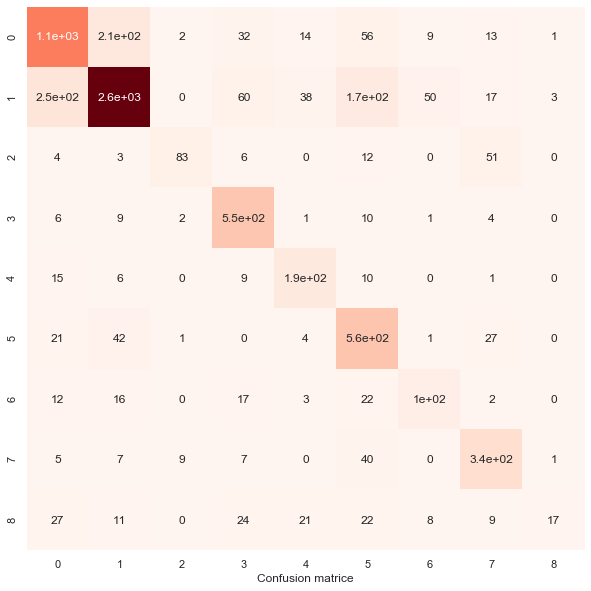

In [53]:
sns.set(rc={'figure.figsize':(10,10)})
p=sns.heatmap(naive_bayes_cm, annot = True, cmap="Reds",cbar=False)
p.axes.xaxis.label.set_text("Confusion matrice")

In [54]:
pd.crosstab(y_test.values, naive_bayes.predict(X_test), rownames=['True Situation '], colnames=['Predicted Situation '], margins=True)

Predicted Situation,0,1,2,3,4,5,6,7,8,All
True Situation,,,,,,,,,,
0,1129,206,2,32,14,56,9,13,1,1462
1,248,2561,0,60,38,172,50,17,3,3149
2,4,3,83,6,0,12,0,51,0,159
3,6,9,2,550,1,10,1,4,0,583
4,15,6,0,9,190,10,0,1,0,231
5,21,42,1,0,4,559,1,27,0,655
6,12,16,0,17,3,22,101,2,0,173
7,5,7,9,7,0,40,0,338,1,407
8,27,11,0,24,21,22,8,9,17,139


### Accuracy Score

In [55]:
print(accuracy_score(y_test, naive_bayes.predict(X_test)))

0.7944811727507904


### Classification Report

In [56]:
print(classification_report(y_test, naive_bayes.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1462
           1       0.90      0.81      0.85      3149
           2       0.86      0.52      0.65       159
           3       0.78      0.94      0.85       583
           4       0.70      0.82      0.76       231
           5       0.62      0.85      0.72       655
           6       0.59      0.58      0.59       173
           7       0.73      0.83      0.78       407
           8       0.77      0.12      0.21       139

    accuracy                           0.79      6958
   macro avg       0.75      0.70      0.69      6958
weighted avg       0.81      0.79      0.79      6958



**On remarque** que :

- Le Recall de la classe 8 est faible , ce qui signifie que le model n'arrive pas a prédire la catégorie -Payday loan - .Autrement dit , il signifie que 9 plaintes sur 10 sont manqués par le modèle et 1 uniqument qu'est correctement identifiée . 




**Mais , en générale le model est bien fonctionnel avec des recall et accuracy > 70 %**